In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
import cv2

from ipywidgets import widgets, interactive, FloatSlider, IntSlider

%matplotlib inline

In [149]:
def abs_sobel_thresh(img_ch, orient='x', sobel_kernel=3, thresh=(0., 1.)):
    if orient == 'x':
        axis = (1, 0)
    elif orient == 'y':
        axis = (0, 1)
    else:
        raise ValueError('orient has to be "x" or "y" not "%s"' % orient)

    sobel = cv2.Sobel(img_ch, cv2.CV_64F, *axis, ksize=sobel_kernel)
    abs_s = np.absolute(sobel)

    binary_output = np.zeros(abs_s.shape)
    binary_output[(abs_s >= thresh[0]) & (abs_s <= thresh[1])] = 1

    return abs_s


def gradient_magnitude_thresh(sobel_x, sobel_y):
    abs_grad_mag = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    return abs_grad_mag


def gradient_direction_thresh(sobel_x, sobel_y, thresh=(0, np.pi / 2)):
    with np.errstate(divide='ignore', invalid='ignore'):
        abs_grad_dir = np.absolute(np.arctan(sobel_y / sobel_x))
        max_val = np.nanmax(abs_grad_dir)
        abs_grad_dir[np.isnan(abs_grad_dir)] = max_val
        dir_binary = np.zeros(abs_grad_dir.shape)
        abs_grad_dir = abs_grad_dir / max_val
        dir_binary[(abs_grad_dir >= thresh[0]) & (abs_grad_dir <= thresh[1])] = 1

    return abs_grad_dir


In [49]:
img.shape

(720, 1280, 3)

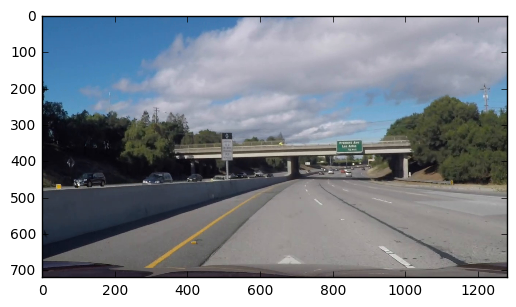

In [229]:
img = imread('test_images/test5.jpg')
img = imresize(img, (720//1, 1280//1, 3))
plt.imshow(img, cmap='gray')

In [127]:

gray = np.mean(img, 2)
x = abs_sobel_thresh(gray, orient='x')
y = abs_sobel_thresh(gray, orient='y')
mag = gradient_magnitude_thresh(x, y)
dir = gradient_direction_thresh(x, y)

In [101]:
def thresh(lower, upper):
    gray = np.mean(img, 2)
    x = abs_sobel_thresh(gray, orient='x')
    y = abs_sobel_thresh(gray, orient='y')
    dir = gradient_direction_thresh(x, y)
    dir_binary = np.zeros(gray.shape)
    dir_binary[(dir >= lower) & (dir <= upper)] = 1
    plt.imshow(dir_binary, cmap='gray')

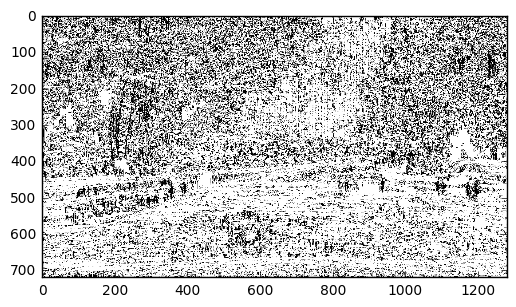

In [102]:
interactive(thresh,
            lower=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=0),
            upper=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=np.pi / 2))

In [175]:
def dir_thresh(lower, upper, r, g, b, y, u, v, h, l, s):
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    yuv = 255-yuv
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    nb_ch = sum([r, g, b, y, u, v, h, l, s])
    ch = np.zeros((*img.shape[:-1], nb_ch))
    i = 0
    if r:
        ch[:,:,i] = img[:,:,0]
        i += 1
    if g:
        ch[:,:,i] = img[:,:,1]
        i += 1
    if b:
        ch[:,:,i] = img[:,:,2]
        i += 1
        
    if y:
        ch[:,:,i] = yuv[:,:,0]
        i += 1
    if u:
        ch[:,:,i] = yuv[:,:,1]
        i += 1
    if v:
        ch[:,:,i] = yuv[:,:,2]
        i += 1
        
    if h:
        ch[:,:,i] = hls[:,:,0]
        i += 1
    if l:
        ch[:,:,i] = hls[:,:,1]
        i += 1
    if s:
        ch[:,:,i] = hls[:,:,2]
        i += 1
        
    
    gray = np.mean(ch, 2)  
    x = abs_sobel_thresh(gray, orient='x')
    y = abs_sobel_thresh(gray, orient='y')
    dir = gradient_direction_thresh(x, y)
    dir_binary = np.zeros(gray.shape)
    dir_binary[(dir >= lower) & (dir <= upper)] = 1
    plt.imshow(dir_binary, cmap='gray')

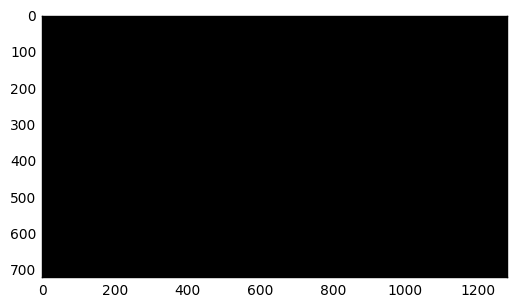

In [214]:
interactive(dir_thresh,
            lower=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=0),
            upper=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=np.pi / 2),
            r=False, g=False, b=False,
            y=False, u=True, v=True,
            h=False, l=False, s=True)

In [211]:
def mag_thresh(lower, upper, lower_dir, upper_dir, r, g, b, y, u, v, h, l, s):
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    yuv = 255-yuv
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    nb_ch = sum([r, g, b, y, u, v, h, l, s])
    ch = np.zeros((*img.shape[:-1], nb_ch))
    i = 0
    if r:
        ch[:,:,i] = img[:,:,0]
        i += 1
    if g:
        ch[:,:,i] = img[:,:,1]
        i += 1
    if b:
        ch[:,:,i] = img[:,:,2]
        i += 1
        
    if y:
        ch[:,:,i] = yuv[:,:,0]
        i += 1
    if u:
        ch[:,:,i] = yuv[:,:,1]
        i += 1
    if v:
        ch[:,:,i] = yuv[:,:,2]
        i += 1
        
    if h:
        ch[:,:,i] = hls[:,:,0]
        i += 1
    if l:
        ch[:,:,i] = hls[:,:,1]
        i += 1
    if s:
        ch[:,:,i] = hls[:,:,2]
        i += 1
        
    
    gray = np.mean(ch, 2).astype(np.float32)/255
    x = abs_sobel_thresh(gray, orient='x')
    y = abs_sobel_thresh(gray, orient='y')
    mag = gradient_magnitude_thresh(x, y)
    dir = gradient_direction_thresh(x, y)
    #mag = mag/mag.max()

    binary = np.zeros(mag.shape)
    binary[(mag >= lower) & (mag <= upper) & (dir >= lower_dir) & (dir <= upper_dir)] = 1
    plt.imshow(binary, cmap='gray')

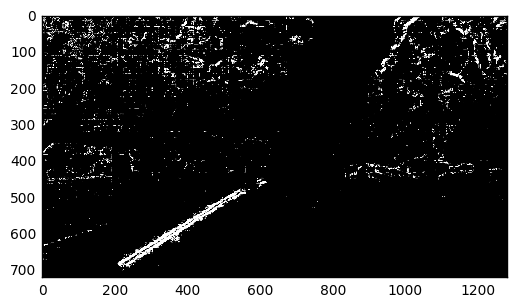

In [203]:
interactive(mag_thresh,
            lower=FloatSlider(min=0, max=1, step=0.01,value=0),
            upper=FloatSlider(min=0, max=1, step=0.01,value=1),
            lower_dir=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=0),
            upper_dir=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=np.pi / 2),
            r=False, g=False, b=False,
            y=False, u=True, v=True,
            h=False, l=False, s=True)

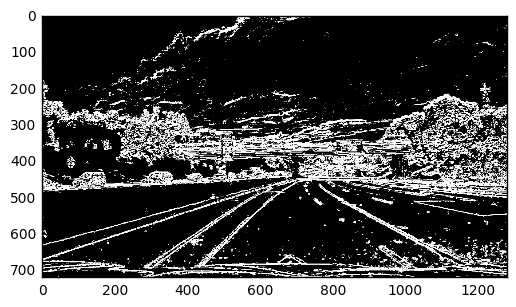

In [215]:
interactive(mag_thresh,
            lower=FloatSlider(min=0, max=1, step=0.01,value=0),
            upper=FloatSlider(min=0, max=1, step=0.01,value=1),
            lower_dir=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=0),
            upper_dir=FloatSlider(min=0, max=np.pi / 2, step=0.01,value=np.pi / 2),
            r=False, g=False, b=False,
            y=False, u=True, v=True,
            h=False, l=False, s=True)

In [191]:
def sobel_thresh(lower, upper, x, r, g, b, y, u, v, h, l, s):
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    yuv = 255-yuv
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    nb_ch = sum([r, g, b, y, u, v, h, l, s])
    ch = np.zeros((*img.shape[:-1], nb_ch))
    i = 0
    if r:
        ch[:,:,i] = img[:,:,0]
        i += 1
    if g:
        ch[:,:,i] = img[:,:,1]
        i += 1
    if b:
        ch[:,:,i] = img[:,:,2]
        i += 1
        
    if y:
        ch[:,:,i] = yuv[:,:,0]
        i += 1
    if u:
        ch[:,:,i] = yuv[:,:,1]
        i += 1
    if v:
        ch[:,:,i] = yuv[:,:,2]
        i += 1
        
    if h:
        ch[:,:,i] = hls[:,:,0]
        i += 1
    if l:
        ch[:,:,i] = hls[:,:,1]
        i += 1
    if s:
        ch[:,:,i] = hls[:,:,2]
        i += 1
        
    
    gray = np.mean(ch, 2).astype(np.float32)/255
    if x:
        orient='x'
    else:
        orient='y'
    s = abs_sobel_thresh(gray, orient=orient)
    #s = s/s.max()

    #s_binary = np.zeros(s.shape)
    s[(s < lower) | (s > upper)] = 0 
    plt.imshow(s, cmap='gray')

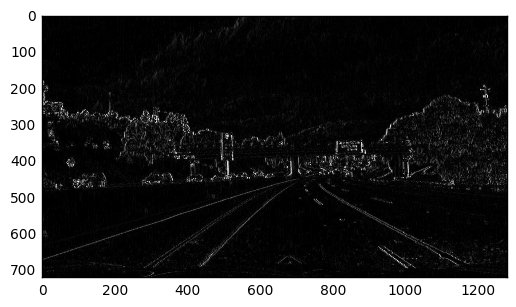

In [216]:
interactive(sobel_thresh,
            x=True,
            lower=FloatSlider(min=0, max=1, step=0.01,value=0),
            upper=FloatSlider(min=0, max=1, step=0.01,value=1),
            r=False, g=False, b=False,
            y=False, u=True, v=True,
            h=False, l=False, s=True)

In [275]:
img = imread('test_images/test1.jpg')

In [273]:
def extract_white(t1, t2, t3, yuv, hls):
    mask = np.copy(img)
    if yuv:
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2YUV)
        mask = 255-mask
    
    if hls:
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2HLS)
    mask = cv2.inRange(img, (t1, t2, t3), (255, 255, 255))

    plt.imshow(mask, cmap='gray')

214


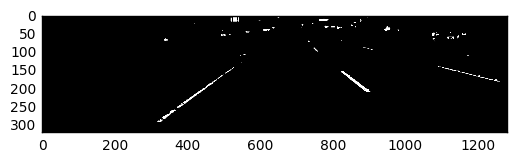

In [302]:
img = imread('test_images/test15.jpg')
#img = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])
img = img[400:,:]
p = int(np.percentile(img, 99.9)-30)
mask = cv2.inRange(img, (p, 1, 1), (255, 255, 255))
plt.imshow(mask, cmap='gray')

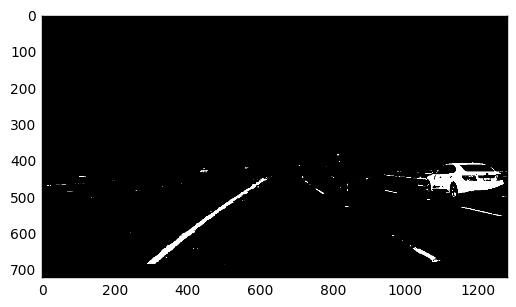

In [276]:
interactive(extract_white,
            t1=IntSlider(min=0, max=255, step=1,value=0),
            t2=IntSlider(min=0, max=255, step=1,value=0),
            t3=IntSlider(min=0, max=255, step=1,value=0),
            yuv=False,
            hls=False)